# Task 2.1

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris_data = np.load("Iris_data.npy")
iris_labels = np.load("Iris_labels.npy")

In [86]:
print (iris_data.size)
print (iris_data.shape)
print (iris_labels.shape)

600
(150, 4)
(150,)


### For the iris data set there are 150 samples and there are 4 features measured for each sample, meaning that there are 600 data points
### For the iris labels there are the labels of all the 150 different samples found in the iris data set

In [87]:
iris_labels.shape

(150,)

In [88]:
iris_labels




array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

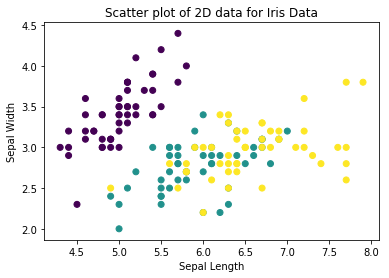

In [89]:
plt.figure() 
plt.scatter(iris_data[:,0], iris_data[:,1], c=iris_labels, ) 
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.title('Scatter plot of 2D data for Iris Data')
plt.show() # Display plot to screen

# Task 2.2
The following code creates a k-means model that fits and and makes predictions for all the data points based on the fitted model. Then those results are plotted on a scatter plot with the Sepal Length against the Sepal Width. If compared with the real data above, the predictions were close. 

In [90]:
from sklearn.cluster import KMeans

In [91]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0).fit(iris_data)

In [92]:
predicted_labels = k_means.predict(iris_data)

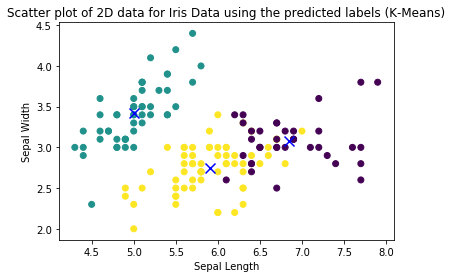

In [93]:
centroids = k_means.cluster_centers_

plt.figure() 
plt.scatter(iris_data[:,0], iris_data[:,1], c=predicted_labels )
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, c='blue')
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.title('Scatter plot of 2D data for Iris Data using the predicted labels (K-Means)')
plt.show() # Display plot to screen

# Task 2.3
In this task a GMM model is created and trained using the iris dataset. Then predictions are made using the model created and the prbabilities for each data point belonging to a class are calculated. Then first graph shows the predicted classes using GMM. The next 3 graphs show the probablities of all the data points belonging to the respective class that the plot represents. 

In [94]:
from sklearn.mixture import GaussianMixture
gmm_model = GaussianMixture(n_components=3,covariance_type='full')
gmm_model.fit(iris_data)
gmm_predictions = gmm_model.predict(iris_data)
# print (gmm_predictions)

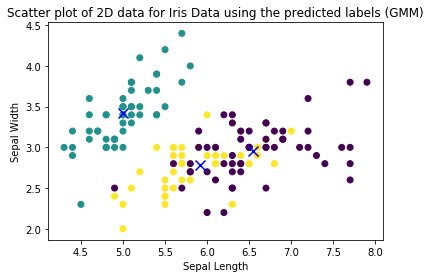

In [95]:
gmm_centroids = gmm_model.means_

plt.figure() 
plt.scatter(iris_data[:,0], iris_data[:,1], c=gmm_predictions )
plt.scatter(gmm_centroids[:, 0], gmm_centroids[:, 1], marker="x", s=100, c='blue')
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.title('Scatter plot of 2D data for Iris Data using the predicted labels (GMM)')
plt.show() # Display plot to screen

In [96]:
prediction_probability = gmm_model.predict_proba(iris_data)
# each array represents the probability that each data point belongs to the particular class
c_1_array = []
c_2_array = []
c_3_array = []

s_array = []
for component in prediction_probability:
    c_1_array.append(component[0])
    c_2_array.append(component[1])
    c_3_array.append(component[2])




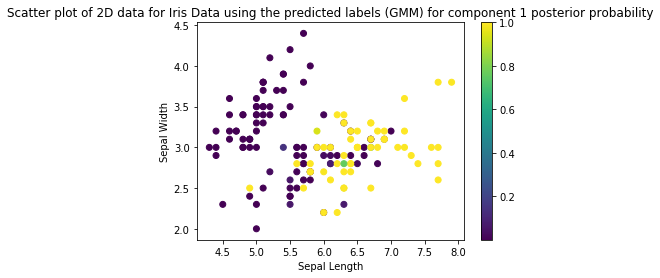

<Figure size 432x288 with 0 Axes>

In [97]:
plt.figure() 
marker_colors = c_1_array
plt.scatter(iris_data[:,0], iris_data[:,1],c=marker_colors ,cmap='viridis')
# plt.scatter(gmm_centroids[:, 0][0], gmm_centroids[:, 1][0], marker="x")
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.colorbar()

plt.title('Scatter plot of 2D data for Iris Data using the predicted labels (GMM) for component 1 posterior probability')
plt.show()
# plt.colorbar();
plt.tight_layout()


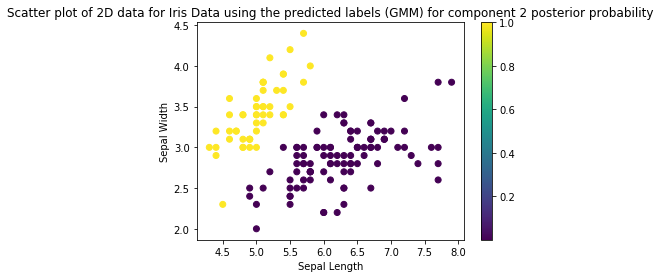

<Figure size 432x288 with 0 Axes>

In [98]:
plt.figure() 
marker_colors = c_2_array
plt.scatter(iris_data[:,0], iris_data[:,1],c=marker_colors ,cmap='viridis')
# plt.scatter(gmm_centroids[:, 0][0], gmm_centroids[:, 1][0], marker="x")
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.colorbar()

plt.title('Scatter plot of 2D data for Iris Data using the predicted labels (GMM) for component 2 posterior probability')
plt.show()
# plt.colorbar();
plt.tight_layout()



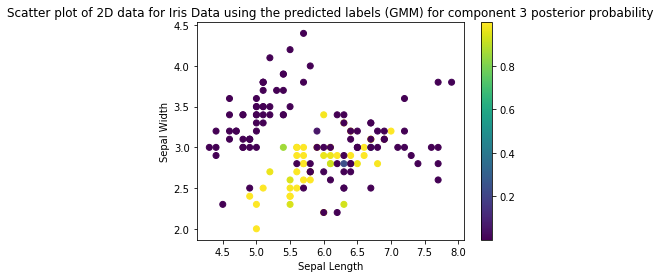

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure() 
marker_colors = c_3_array
plt.scatter(iris_data[:,0], iris_data[:,1],c=marker_colors ,cmap='viridis')
# plt.scatter(gmm_centroids[:, 0][0], gmm_centroids[:, 1][0], marker="x")
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.colorbar()

plt.title('Scatter plot of 2D data for Iris Data using the predicted labels (GMM) for component 3 posterior probability')
plt.show()
# plt.colorbar();
plt.tight_layout()


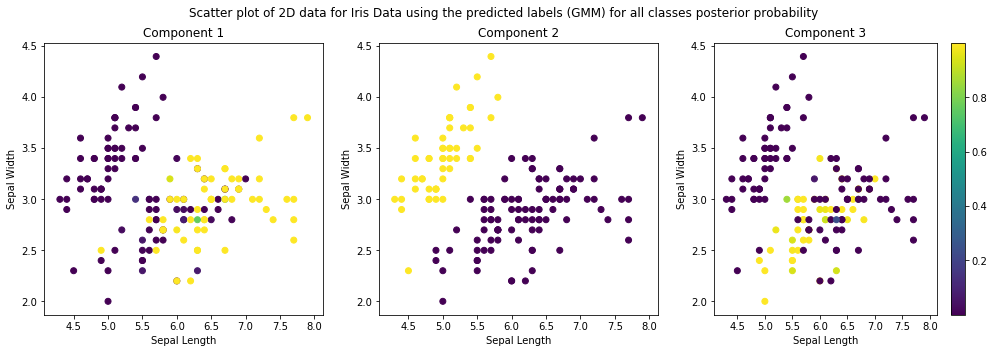

In [101]:
# example data
# x = np.arange(0.1, 4, 0.1)
# y1 = np.exp(-1.0 * x)
# y2 = np.exp(-0.5 * x)

# example variable error bar values
# y1err = 0.1 + 0.1 * np.sqrt(x)
# y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig, (ax_0, ax_1, ax_2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(17, 5))

ax_0.set_title('Component 1')
marker_colors_1 = c_1_array
plot = ax_0.scatter(iris_data[:,0], iris_data[:,1],c=marker_colors_1,cmap='viridis' )
ax_0.set_xlabel('Sepal Length') 
ax_0.set_ylabel('Sepal Width') 


ax_1.set_title('Component 2')
marker_colors_2 = c_2_array
plot = ax_1.scatter(iris_data[:,0], iris_data[:,1],c=marker_colors_2,cmap='viridis' )
ax_1.set_xlabel('Sepal Length') 
ax_1.set_ylabel('Sepal Width') 


ax_2.set_title('Component 3')
marker_colors_3 = c_3_array
plot = ax_2.scatter(iris_data[:,0], iris_data[:,1],c=marker_colors_3,cmap='viridis' )
ax_2.set_xlabel('Sepal Length') 
ax_2.set_ylabel('Sepal Width') 


fig.suptitle('Scatter plot of 2D data for Iris Data using the predicted labels (GMM) for all classes posterior probability')
fig.colorbar(plot)
fig.show()